In [7]:
from qiskit import IBMQ
# IBMQ.save_account(MY_API_TOKEN)
import qiskit 
qiskit.__version__

import numpy as np
import random
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info.operators import Operator
from qiskit import(QuantumCircuit, execute, Aer)
from qiskit.visualization import plot_histogram
from qiskit.extensions import Initialize # Import the Inititialize function
from qiskit.aqua.circuits.gates import multi_control_toffoli_gate
from qiskit.aqua.circuits.gates import multi_control_multi_target_gate

In [8]:
visible = 2
hidden = 2

x = np.array([random.uniform(0, 1) for n in range(visible)])
weight_matrix = np.random.rand(visible, hidden) * np.pi
# [[np.pi/6, np.pi/4], [np.pi / 2, np.pi]]


In [9]:
qc = QuantumCircuit(visible + hidden, visible)
initial_state = [[np.sqrt(x[i]), np.sqrt(1-x[i])] for i in range(len(x))]
for i in range(visible):
    initialize_qubit = Initialize(initial_state[i])
    qc.append(initialize_qubit, [i])
    qc.h(i)
for i in range(hidden):
    for j in range(visible):
        qc.rz(weight_matrix[j][i], j)
#     print(list(range(visible)) + [visible + i])
    multi_control_toffoli_gate._multicx(qc, list(range(visible)) + [visible + i])
for i in range(hidden):
    qc.h(visible + i)
# Map the quantum measurement to the classical bits
qc.measure(list(range(visible)), list(range(visible)))


Total count for 0 and 1 are: {'01': 7, '00': 642, '11': 8, '10': 343}


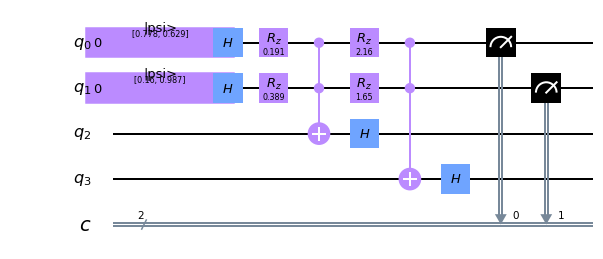

In [10]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(qc, simulator, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(qc)
print("\nTotal count for 0 and 1 are:",counts)
qc.draw(output='mpl')

In [14]:
# komórka do testowania wieloqubitowej bramki CNOT
# NIE ZALEŻNA OD WŁAŚCIWEJ SIECI

# work = ancilla
def n_control_gate(qc, target, control: list, work: list, gate_type):
    if len(control) - len(work) != 1:
        raise Exception("Wrong number of control or work qubits!")

    qc.toffoli(control[0], control[1], work[0])
    control_left = control[2:]
    
    for i, c_bit in enumerate(control_left):
        qc.toffoli(c_bit, work[i], work[i+1])
    
    qc.gate_type(work[-1], target)
    
    for i, c_bit in reversed(list(enumerate(control_left))):
        qc.toffoli(c_bit, work[i], work[i+1])
    
    qc.toffoli(control[0], control[1], work[0])
    
    

        

visible = 3
hidden = 3
ancilla = visible - 1

# qr_visible = QuantumRegister(visible, 'visible')
# qr_hidden = QuantumRegister(hidden, 'hidden')
# cr = ClassicalRegister(3, 'c')
# if visible > 2:
#     anc = QuantumRegister(visible - 2, 'ancilla')
#     qc = QuantumCircuit(qr_visible, qr_hidden, anc, cr)
# else:
#     qc = QuantumCircuit(qr_visible, qr_hidden, cr)


# qr_visible = QuantumRegister(visible, 'visible')
qr = QuantumRegister(visible + hidden + ancilla, 'q')
cr = ClassicalRegister(3, 'c')
qc = QuantumCircuit(qr, cr)


for i in range(visible + hidden):
    initialize_qubit = Initialize([0, 1])
    qc.append(initialize_qubit, [i])
# initialize_qubit = Initialize([1, 0])
# qc.append(initialize_qubit, [2])
# for i in range(hidden):
#     for j in range(visible):
#         qc.rz(weight_matrix[j][i], j)
print(list(range(visible)) + [visible + 0])
print(list(range(visible+hidden, visible+hidden+ancilla)))
# multi_control_multi_target_gate.mcmt(qc, list(range(visible)), [], QuantumCircuit.cx, [visible])

# print([qr_visible[i] for i in range(visible)])
# print([anc[i] for i in range(ancilla)])
# print([qr_hidden[i] for i in range(hidden)])
for j in range(hidden):
    multi_control_multi_target_gate.mcmt(qc, [qr[i] for i in range(visible)], [qr[i] for i in range(visible + hidden, visible + hidden + ancilla)], QuantumCircuit.cx, [qr[visible + j]])

# multi_control_multi_target_gate.mcmt(qc, [qr_visible[i] for i in range(visible)], [anc[i] for i in range(ancilla)], QuantumCircuit.cx, [qr_hidden[0]])
# qc.measure(list(range(visible+hidden)), list(range(visible + hidden)))
# (qc, list(range(visible)) + [visible + 0], qancilla = 6)


# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(qc, simulator, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(qc)
print("\nTotal count for 0 and 1 are:",counts)
qc.draw()

No measurements in circuit "circuit8": count data will return all zeros.


[0, 1, 2, 3]
[6, 7]

Total count for 0 and 1 are: {'000': 1000}


┌─────────────────┐                                                  »
q_0: |0>┤ Initialize(0,1) ├──■───────────────────■────■───────────────────■──»
        ├─────────────────┤  │                   │    │                   │  »
q_1: |0>┤ Initialize(0,1) ├──■───────────────────■────■───────────────────■──»
        ├─────────────────┤  │                   │    │                   │  »
q_2: |0>┤ Initialize(0,1) ├──┼────■─────────■────┼────┼────■─────────■────┼──»
        ├─────────────────┤  │    │  ┌───┐  │    │    │    │         │    │  »
q_3: |0>┤ Initialize(0,1) ├──┼────┼──┤ X ├──┼────┼────┼────┼─────────┼────┼──»
        ├─────────────────┤  │    │  └─┬─┘  │    │    │    │  ┌───┐  │    │  »
q_4: |0>┤ Initialize(0,1) ├──┼────┼────┼────┼────┼────┼────┼──┤ X ├──┼────┼──»
        ├─────────────────┤  │    │    │    │    │    │    │  └─┬─┘  │    │  »
q_5: |0>┤ Initialize(0,1) ├──┼────┼────┼────┼────┼────┼────┼────┼────┼────┼──»
        └─────────────────┘┌─┴─┐  │    │    │  ┌─┴─┐┌─┴─┐  │    │    │  ┌─┴─┐»
q_6: |0>───────────────────┤ X ├──■────┼────■──┤ X ├┤ X ├──■────┼────■──┤ X ├»
                           └───┘┌─┴─┐  │  ┌─┴─┐└───┘└───┘┌─┴─┐  │  ┌─┴─┐└───┘»
q_7: |0>────────────────────────┤ X ├──■──┤ X ├──────────┤ X ├──■──┤ X ├─────»
                                └───┘     └───┘          └───┘     └───┘     »
 c_0: 0 ═════════════════════════════════════════════════════════════════════»
                                                                             »
 c_1: 0 ═════════════════════════════════════════════════════════════════════»
                                                                             »
 c_2: 0 ═════════════════════════════════════════════════════════════════════»
                                                                             »
«                              
«q_0: ──■───────────────────■──
«       │                   │  
«q_1: ──■───────────────────■──
«       │                   │  
«q_2: ──┼────■─────────■────┼──
«       │    │         │    │  
«q_3: ──┼────┼─────────┼────┼──
«       │    │         │    │  
«q_4: ──┼────┼─────────┼────┼──
«       │    │  ┌───┐  │    │  
«q_5: ──┼────┼──┤ X ├──┼────┼──
«     ┌─┴─┐  │  └─┬─┘  │  ┌─┴─┐
«q_6: ┤ X ├──■────┼────■──┤ X ├
«     └───┘┌─┴─┐  │  ┌─┴─┐└───┘
«q_7: ─────┤ X ├──■──┤ X ├─────
«          └───┘     └───┘     
«c_0: ═════════════════════════
«                              
«c_1: ═════════════════════════
«                              
«c_2: ═════════════════════════
«

In [7]:
print(weight_matrix)
sinus_matrix = np.sin(weight_matrix + np.pi/4)
print(sinus_matrix)
print(sinus_matrix.prod(axis = 0))
phi = np.arcsin(sinus_matrix.prod(axis = 0))
print(phi)
psi = phi + np.pi/4
print(psi)
ph = np.sin(psi)**2
print(ph)

[[0.54031268 1.26260071]
 [2.29787886 3.10340355]]
[[ 0.97011659  0.88828326]
 [ 0.05828258 -0.67959401]]
[ 0.0565409  -0.60367198]
[ 0.05657107 -0.64809902]
[0.84196923 0.13729914]
[0.55645045 0.0187329 ]


In [13]:
# template do uczenia

def update():
    global weight_matrix
    
    sinus_matrix = np.sin(weight_matrix + np.pi/4)
    phi = np.arcsin(sinus_matrix.prod(axis = 0))
    psi = phi + np.pi/4
    ph = np.sin(psi)**2
    
    exp_ph = []
    ...

num_epochs = 3
weight_matrix = np.random.rand(visible, hidden) * np.pi

for i in range(num_epochs):
    qc = QuantumCircuit(visible + hidden, visible)
    initial_state = [[np.sqrt(x[i]), np.sqrt(1-x[i])] for i in range(len(x))]
    for i in range(visible):
        initialize_qubit = Initialize(initial_state[i])
        qc.append(initialize_qubit, [i])
        qc.h(i)
    for i in range(hidden):
        for j in range(visible):
            qc.rz(weight_matrix[j][i], j)
    #     print(list(range(visible)) + [visible + i])
        multi_control_toffoli_gate._multicx(qc, list(range(visible)) + [visible + i])
    for i in range(hidden):
        qc.h(visible + i)
    # Map the quantum measurement to the classical bits
    qc.measure(list(range(visible)), list(range(visible)))
    
    simulator = Aer.get_backend('qasm_simulator')

    # Execute the circuit on the qasm simulator
    job = execute(qc, simulator, shots=1000)

    # Grab results from the job
    result = job.result()

    # Returns counts
    counts = result.get_counts(qc)
    print("\nTotal count for 0 and 1 are:",counts)
    print(weight_matrix)
#     qc.draw()    
    
    update()
    


Total count for 0 and 1 are: {'10': 276, '00': 591, '11': 53, '01': 80}
[[1.40253494 0.82552989]
 [0.32263556 0.97087651]]

Total count for 0 and 1 are: {'10': 288, '00': 596, '11': 45, '01': 71}
[[1.40253494 0.82552989]
 [0.32263556 0.97087651]]

Total count for 0 and 1 are: {'10': 278, '00': 588, '11': 46, '01': 88}
[[1.40253494 0.82552989]
 [0.32263556 0.97087651]]
